In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import numpy as np
import seaborn as sns

In [2]:
#Read the t-SNE features file and standardise 
df = pd.read_csv('2YTSNEfeatures.csv', index_col=[0])
transform = preprocessing.StandardScaler()
dft = transform.fit(df).transform(df)

In [3]:
#Optimise the best K-value from 2 to 100 by making a dataferame of distortion (elbow) and sihouette average
distortions = []
silhouette_avg = []
for i in range(2, 100):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=40, max_iter=600,
        tol=1e-06, random_state=0
    ).fit(dft)
    distortions.append(km.inertia_)
    silhouette_avg.append(silhouette_score(dft, km.labels_))

range = np.arange(2, 100, 1).tolist()
distortions = distortions
data_elbow = {'range':range, 'distortions': distortions}
dfel = pd.DataFrame(data_elbow)

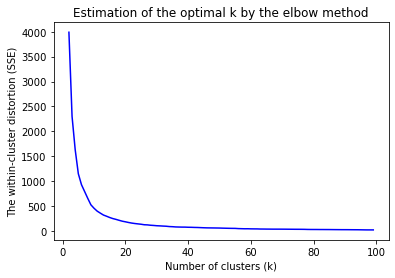

In [4]:
# plot elbow curve
sns.lineplot(y ='distortions', x = 'range', data=dfel, color='blue')
plt.title('Estimation of the optimal k by the elbow method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('The within-cluster distortion (SSE)')
plt.show()

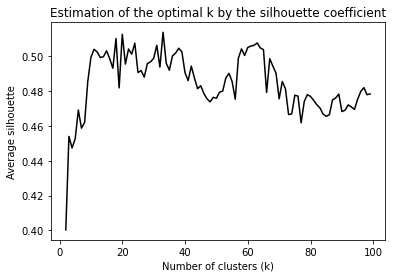

In [5]:
# plot silhuette curve
silhouette =  silhouette_avg
data_sil= {'range':range, 'silhouette average':silhouette}
dfsil = pd.DataFrame(data_sil)

sns.lineplot(y ='silhouette average', x = 'range', data=dfsil, color='black')
plt.title('Estimation of the optimal k by the silhouette coefficient')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

#optimise KMeans by hyperparameter tuning with best k-values
hyperparams = {"n_clusters": [6, 10, 18, 20, 33], "max_iter": [300, 600, 900],  "tol":[.00000001, .0000001, .000001], "n_init": [20, 40, 60]}
kmeans = KMeans()
kmeans_cv=GridSearchCV(kmeans, hyperparams, cv=10)
kmeans_cv.fit(df)
print("tuned hpyerparameters :(best parameters) ",kmeans_cv.best_params_)
print("accuracy :",kmeans_cv.best_score_)
labels = kmeans_cv.predict(df)
score = silhouette_score(df, labels)
print(score)
print(kmeans_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'max_iter': 600, 'n_clusters': 33, 'n_init': 60, 'tol': 1e-08}
accuracy : -26781.962907229317
0.5075345226733929
{'max_iter': 600, 'n_clusters': 33, 'n_init': 60, 'tol': 1e-08}


In [12]:
n=33
kmeans = KMeans(n_clusters=n, init='random', n_init=60, max_iter=600, tol=1e-08).fit(dft)

labels = kmeans.predict(dft)
list = labels.tolist()
score = silhouette_score(df, labels)
centers = kmeans.cluster_centers_
dfkm = pd.DataFrame(dft)
dfkm.columns=('X', 'Y')
dfkm['label'] = list
df2 = pd.DataFrame(centers)
df2.columns=['x', 'y']
print("score", score)
print(dfkm)

score 0.4881350624254205
             X         Y  label
0    -0.066157  1.220573     30
1    -0.069446  1.225863     30
2    -0.075958  1.232917     30
3    -0.445870  0.134223     31
4    -0.445918  0.135143     31
...        ...       ...    ...
3386 -0.100463 -1.388445      2
3387 -0.519381 -0.472074     11
3388  0.619148 -0.256893     15
3389  1.472285 -1.071057      5
3390  0.615359 -0.244802     15

[3391 rows x 3 columns]


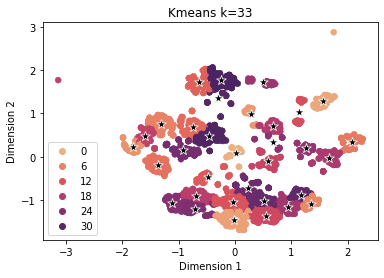

In [13]:
#plot the KMeans clusters by colours and show cluster center by black star
sns.scatterplot(x ='X', y = 'Y', data=dfkm, hue="label", palette="flare", ec="face")
plt.ylabel('Dimension 2')
plt.xlabel('Dimension 1')
plt.title('Kmeans k='+str(n))
sns.scatterplot(x='x', y='y', data=df2, marker="*", color='black', alpha=1, s=100)
plt.show()
